In [1]:
# Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn 
import math

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
from scipy.stats import expon as sp_expon
from scipy.stats import randint as sp_randint

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [5]:
pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

In [6]:
# train file open
train_file = 'train.csv'
df = pd.read_csv(train_file, delimiter=',')

In [7]:
# column names in dataframe
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [8]:
# Check how many entries are missing for the selected features
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df = df.drop(columns = ['Loan_ID'])

In [10]:
# display dataframe
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# num missing values
num_missing = df.isna().any(axis = 1).sum()
num_missing

134

In [13]:
df.shape

(614, 12)

In [14]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Retrieving number of values contained in a column to see whether it can be converted as a binary value

In [15]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [16]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [17]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [20]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

Converting categorical values to binary values

In [22]:
# how to get rid of decimal point?
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [23]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [24]:
df.duplicated().values.any()

False

In [25]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
df.isna().sum().index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [27]:
# deriving new features from given columns 
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['AverageIncomePP'] = (df['ApplicantIncome'] + df['CoapplicantIncome'])/2

In [28]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,AverageIncomePP
0,1.0,0.0,0,1,0.0,5849,0.0,120.0,360.0,1.0,Urban,1,5849.0,2924.5
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,3045.5
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,1500.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,2470.5
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0,1450.0
610,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0,2053.0
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0,4156.0
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0,3791.5


In [29]:
df.dtypes

Gender               float64
Married              float64
Dependents            object
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
TotalIncome          float64
AverageIncomePP      float64
dtype: object

In [30]:
cat = df.select_dtypes(include = "object").columns

In [31]:
# oversampling by random resampling with replacement from minority class to reduce class imbalance


import random

neg_rows = df[df['Loan_Status'] == 0].dropna()

neg_rows.reset_index(inplace=True, drop=True)

added_rows = 0

while(added_rows < 230):
    
    pick_row = random.randrange(0, len(neg_rows))
    
    df = df.append(neg_rows.loc[pick_row].to_dict(), ignore_index=True)
    
    added_rows += 1


In [32]:
df['Loan_Status'].value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [33]:
# trying undersampling

'''

removed = 0

while removed < 100:
    
    yes_loan_row = df[df['Loan_Status'] == 1].head(1).index[0]

    df.drop(yes_loan_row, inplace=True)
    
    removed += 1
    
'''

"\n\nremoved = 0\n\nwhile removed < 100:\n    \n    yes_loan_row = df[df['Loan_Status'] == 1].head(1).index[0]\n\n    df.drop(yes_loan_row, inplace=True)\n    \n    removed += 1\n    \n"

In [34]:
df.info()
df = df.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             844 non-null    float64
 1   Married            844 non-null    float64
 2   Dependents         844 non-null    object 
 3   Education          844 non-null    int64  
 4   Self_Employed      844 non-null    float64
 5   ApplicantIncome    844 non-null    int64  
 6   CoapplicantIncome  844 non-null    float64
 7   LoanAmount         844 non-null    float64
 8   Loan_Amount_Term   844 non-null    float64
 9   Credit_History     844 non-null    float64
 10  Property_Area      844 non-null    object 
 11  Loan_Status        844 non-null    int64  
 12  TotalIncome        844 non-null    float64
 13  AverageIncomePP    844 non-null    float64
dtypes: float64(9), int64(3), object(2)
memory usage: 92.4+ KB


In [35]:
df.fillna(method='bfill', inplace= True)
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
AverageIncomePP      0
dtype: int64

In [36]:
# sometimes values missing even after fill so drop those
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [37]:
X = df.drop('Loan_Status',1)
y = df.Loan_Status

In [38]:
# train file open
test_file = 'test.csv'
tf = pd.read_csv(test_file, delimiter=',')

In [39]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [40]:
for col in df.columns:
    print(col)
    display(df[col].value_counts())

Gender


1.0    693
0.0    151
Name: Gender, dtype: int64

Married


1.0    539
0.0    305
Name: Married, dtype: int64

Dependents


0    490
1    153
2    131
3     70
Name: Dependents, dtype: int64

Education


1    642
0    202
Name: Education, dtype: int64

Self_Employed


0.0    737
1.0    107
Name: Self_Employed, dtype: int64

ApplicantIncome


4583    14
4166    10
2500    10
3750     9
2600     9
        ..
3315     1
3812     1
3463     1
3155     1
7583     1
Name: ApplicantIncome, Length: 505, dtype: int64

CoapplicantIncome


0.0       390
1666.0      8
2083.0      6
3000.0      6
1667.0      5
         ... 
5000.0      1
5701.0      1
4417.0      1
1868.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

LoanAmount


120.0    63
110.0    26
100.0    21
128.0    18
160.0    16
         ..
207.0     1
330.0     1
304.0     1
279.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

Loan_Amount_Term


360.0    712
180.0     64
480.0     27
300.0     19
84.0       6
240.0      5
36.0       5
120.0      3
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Credit_History


1.0    648
0.0    196
Name: Credit_History, dtype: int64

Property_Area


Semiurban    301
Urban        282
Rural        261
Name: Property_Area, dtype: int64

Loan_Status


1    422
0    422
Name: Loan_Status, dtype: int64

TotalIncome


4166.0     8
4583.0     8
10000.0    6
6000.0     6
3750.0     5
          ..
3716.0     1
4545.0     1
6400.0     1
4758.0     1
7583.0     1
Name: TotalIncome, Length: 554, dtype: int64

AverageIncomePP


2083.0    8
2291.5    8
5000.0    6
3000.0    6
1875.0    5
         ..
1858.0    1
2272.5    1
3200.0    1
2379.0    1
3791.5    1
Name: AverageIncomePP, Length: 554, dtype: int64

In [41]:
# LoanAmount, Loan_Amount_Term, TotalIncome

Text(0, 0.5, 'LoanAmount')

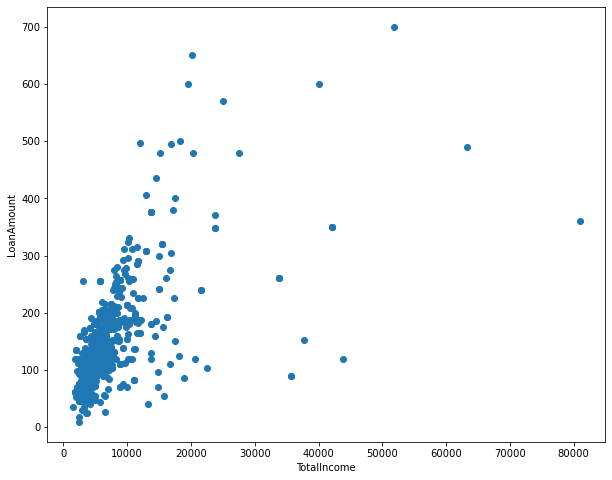

In [42]:
plt.scatter(df['TotalIncome'], df['LoanAmount']);
plt.xlabel('TotalIncome')
plt.ylabel('LoanAmount')

In [43]:
X = pd.get_dummies(X)
df=pd.get_dummies(df)
#tf=pd.get_dummies(tf)

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# 5, 10 13 

# Selecting Features With Best ANOVA F-Values
# Creating an SelectKBest object to select features with two best ANOVA F-Values
fvalue_Best = SelectKBest(f_classif, k=2)
# Applying the SelectKBest object to the features and target
X_kbest = fvalue_Best.fit_transform(X, y)
print(); print(X_kbest)

# Showing results
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 1.]
 [1. 0.]
 [0. 1.]]
Original number of features: (844, 18)
Reduced number of features: (844, 2)


In [49]:
chosen_cols = X.columns[fvalue_Best.get_support()]
chosen_cols

Index(['Credit_History', 'Property_Area_Semiurban'], dtype='object')

In [196]:
X.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'AverageIncomePP',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [197]:
X = X[chosen_cols]

In [198]:
corr_df = df.drop('Loan_Status', axis=1)

corr_df['Loan_Status'] = y


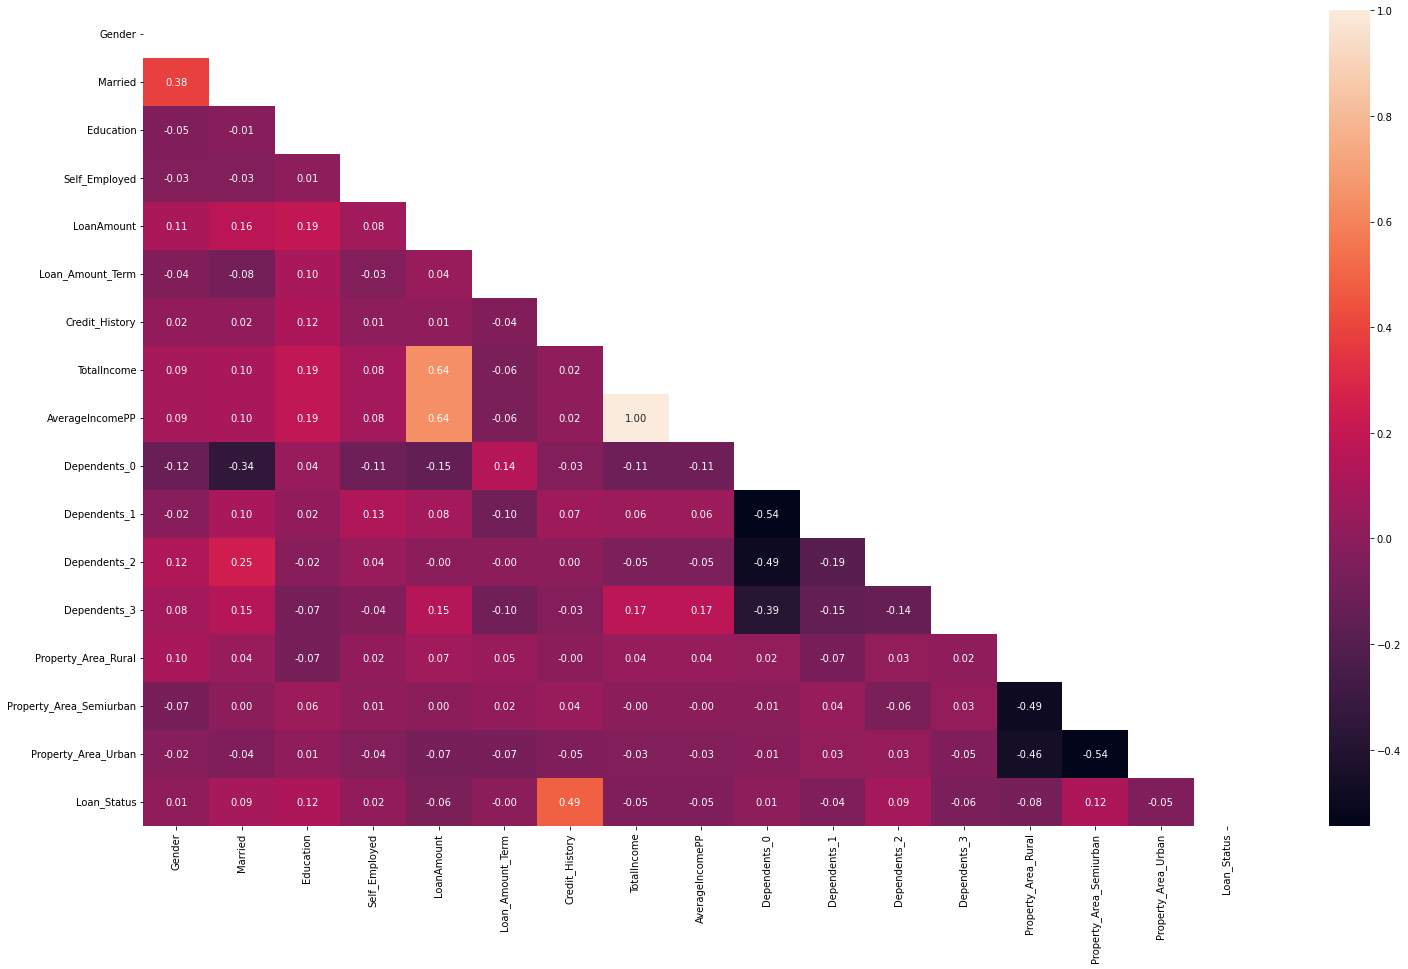

                           Gender   Married  Education  Self_Employed  \
Gender                   1.000000  0.378985  -0.047049      -0.033870   
Married                  0.378985  1.000000  -0.014028      -0.034937   
Education               -0.047049 -0.014028   1.000000       0.007259   
Self_Employed           -0.033870 -0.034937   0.007259       1.000000   
LoanAmount               0.113301  0.161793   0.193567       0.075453   
Loan_Amount_Term        -0.040501 -0.081940   0.096034      -0.032357   
Credit_History           0.019423  0.017168   0.116031       0.008532   
TotalIncome              0.094765  0.096669   0.191560       0.077242   
AverageIncomePP          0.094765  0.096669   0.191560       0.077242   
Dependents_0            -0.121800 -0.339499   0.042467      -0.105350   
Dependents_1            -0.019143  0.096250   0.019217       0.129157   
Dependents_2             0.120433  0.245915  -0.017388       0.041890   
Dependents_3             0.082471  0.146836  -0.074

In [199]:
corrmat = corr_df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(corrmat, annot=True,fmt='.2f',mask=mask)
plt.show()
print(corrmat)

In [200]:
# pd.plotting.scatter_matrix(df, figsize =(50,50))

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, shuffle=True)

In [202]:
y_train.value_counts()

1    362
0    355
Name: Loan_Status, dtype: int64

<h4> Decision tree classifier </h4>

In [203]:
# yes cross validation, no hyper parameter tuning

dt_clf = DecisionTreeClassifier(random_state=0)

scores = cross_val_score(dt_clf, X, y, cv=5, scoring="accuracy")

print(scores.mean())


0.8543181177796562


In [204]:
# no cross validation, no hyper parameter tuning

from sklearn import metrics

dt_clf = DecisionTreeClassifier(random_state=0)

dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.8661417322834646


In [205]:
#define metrics
y_pred_proba = dt_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

nhp_fpr, nhp_tpr = fpr, tpr,

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

AUC score 0.8626865671641791


In [206]:
# tuning parameters

# Defining 3-dimensional hyperparameter space as a Python dictionary
max_depth = [int(x) for x in np.linspace(10, 610, num = 11)]
max_depth.append(None)

hyperparameter_space = {'max_depth': max_depth, # [2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import RandomizedSearchCV

dt_clf = DecisionTreeClassifier(random_state=0)

'''
rs = RandomizedSearchCV(dt_clf, param_distributions=hyperparameter_space,
                        n_iter=400, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=5, return_train_score=True)
'''

from sklearn.model_selection import GridSearchCV
rs = GridSearchCV(dt_clf, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=5, return_train_score=True)



rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)

'''
Using grid search
Optimal hyperparameter combination: {'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 4}

Mean cross-validated training accuracy score: 0.8158605283605282
Test accuracy: 0.89
'''


Optimal hyperparameter combination: {'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mean cross-validated training accuracy score: 0.8103535353535353


"\nUsing grid search\nOptimal hyperparameter combination: {'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 4}\n\nMean cross-validated training accuracy score: 0.8158605283605282\nTest accuracy: 0.89\n"

Test accuracy: 0.87
[[62  5]
 [12 48]]


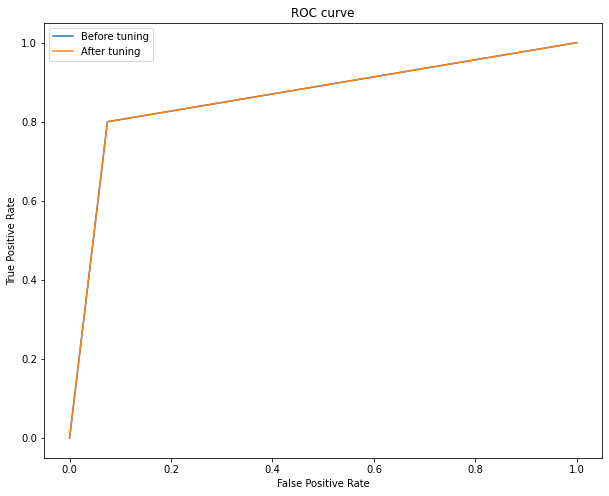

AUC score 0.8626865671641791


In [207]:
# no cross validation, yes hyper parameter tuning

rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))


print(metrics.confusion_matrix(y_test, y_pred))

#define metrics
y_pred_proba = rs.best_estimator_.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

dt_fpr, dt_tpr = fpr,tpr

#create ROC curve
plt.plot(nhp_fpr, nhp_tpr, label='Before tuning')
plt.plot(fpr,tpr, label='After tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.title('ROC curve')
plt.show()


auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

In [208]:
# yes cross validation, yes hyper parameter tuning

from  sklearn import model_selection

params= rs.best_params_

dt_clf = DecisionTreeClassifier(random_state=0, min_samples_split=params['min_samples_split'], min_samples_leaf=params['min_samples_leaf'], max_depth=params['max_depth'])

scores = model_selection.cross_validate(dt_clf, X, y, cv=5, scoring="accuracy",  return_train_score=True)

print('Train scores:')
print(scores['train_score'].mean())
print('Test scores:')
print(scores['test_score'].mean())


Train scores:
1.0
Test scores:
0.8543181177796562


In [222]:
# sns.distplot(scores)

X = df.iloc[:, 7].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 9].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
model.fit(X, Y)  # perform linear regression
Y_pred = model.predict(X)  # make predictions

In [209]:
# when not using cross validation

'''
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, t_test = train_test_split(X,y, test_size=0.3)

model.fit(x_train, y_train)
pred_cv = model.predict(x_cv)
accuracy_score(t_test,pred_cv)
'''

'\nfrom sklearn.model_selection import train_test_split\n\nx_train, x_cv, y_train, t_test = train_test_split(X,y, test_size=0.3)\n\nmodel.fit(x_train, y_train)\npred_cv = model.predict(x_cv)\naccuracy_score(t_test,pred_cv)\n'

<h4> Base classifier </h4>

In [210]:
# baseline classifier

from sklearn.base import BaseEstimator

class MajorityBaseClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.full(len(X), 1)
    
baseline_model = MajorityBaseClassifier()
scores = cross_val_score(baseline_model, X, y, cv=5, scoring="accuracy")

print(scores.mean())



0.4994082840236686


<AxesSubplot:ylabel='Density'>

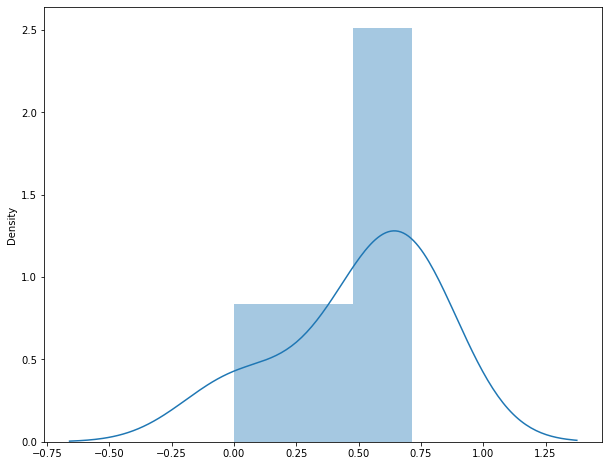

In [211]:
sns.distplot(scores)

In [212]:
n_estimators = sp_expon(scale=100)
max_depth = sp_randint(1, 40)

<h4> Random Forest </h4>

In [213]:
# yes cross validation, no hyper parameter tuning

rdf_clf = RandomForestClassifier()

scores = cross_val_score(rdf_clf, X, y, cv=5, scoring="accuracy")

print(scores.mean())

0.8874964778810932


In [214]:
# no cross validation, no hyper parameter tuning

rdf_clf = RandomForestClassifier()

rdf_clf.fit(X_train, y_train)

y_pred = rdf_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8661417322834646


In [215]:
#define metrics
y_pred_proba = rdf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

nhp_fpr, nhp_tpr = fpr, tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

AUC score 0.9414179104477612


In [216]:
# tuning parameters

'''

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 5000, num = 30)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
hyperparameter_space = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': [1,2,3,4,5,6,8,10],
               'min_samples_leaf': [1,2,4,6,8,10,20,30],
               'bootstrap': bootstrap}


rdf_clf = RandomForestClassifier()

rs = RandomizedSearchCV(rdf_clf, param_distributions=hyperparameter_space,
                        n_iter=30, scoring="accuracy", random_state=0,  # 30 iter 
                        n_jobs=-1, cv=5, return_train_score=True)

from sklearn.model_selection import train_test_split

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)

# no cross validation, yes hyper parameter tuning

rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

'''

# takes about 6 min

'\n\n# Number of trees in random forest\nn_estimators = [int(x) for x in np.linspace(start = 200, stop = 5000, num = 30)]\n# Number of features to consider at every split\nmax_features = [\'auto\', \'sqrt\']\n# Maximum number of levels in tree\nmax_depth = [int(x) for x in np.linspace(10, 110, num = 11)]\nmax_depth.append(None)\n# Minimum number of samples required to split a node\nmin_samples_split = [2, 5, 10]\n# Minimum number of samples required at each leaf node\nmin_samples_leaf = [1, 2, 4]\n# Method of selecting samples for training each tree\nbootstrap = [True, False]\n# Create the random grid\nhyperparameter_space = {\'n_estimators\': n_estimators,\n               \'max_features\': max_features,\n               \'max_depth\': max_depth,\n               \'min_samples_split\': [1,2,3,4,5,6,8,10],\n               \'min_samples_leaf\': [1,2,4,6,8,10,20,30],\n               \'bootstrap\': bootstrap}\n\n\nrdf_clf = RandomForestClassifier()\n\nrs = RandomizedSearchCV(rdf_clf, param_d

In [217]:
params = {'n_estimators': 4503, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}

# no cross validation, yes hyper parameter tuning

rdf_clf = RandomForestClassifier(n_estimators=params['n_estimators'], min_samples_split= params['min_samples_split'], min_samples_leaf= params['min_samples_leaf'], max_features=params['max_features'], max_depth=params['max_depth'], bootstrap=params['bootstrap'])

rdf_clf.fit(X_train, y_train)
y_pred = rdf_clf.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Test accuracy: 0.87


In [218]:

print(metrics.confusion_matrix(y_test, y_pred))

#define metrics
y_pred_proba = rdf_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

rdf_fpr, rdf_tpr = fpr,tpr

#create ROC curve
plt.plot(nhp_fpr, nhp_tpr, label='Before tuning')
plt.plot(fpr,tpr, label='After tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.title('ROC curve')
plt.show()


auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

[[60  7]
 [10 50]]


KeyboardInterrupt: 

In [ ]:
# yes cross validation, yes hyper parameter tuning

# params = rs.best_params_

rdf_clf = RandomForestClassifier(n_estimators=params['n_estimators'], min_samples_split= params['min_samples_split'], min_samples_leaf= params['min_samples_leaf'], max_features=params['max_features'], max_depth=params['max_depth'], bootstrap=params['bootstrap'])

scores = model_selection.cross_validate(rdf_clf, X, y, cv=5, scoring="accuracy",  return_train_score=True)

print('Train scores:')
print(scores['train_score'].mean())
print('Test scores:')
print(scores['test_score'].mean())

Train scores:
0.9991115494192417
Test scores:
0.9052620456466609


In [ ]:
# using the feature importance variable
'''
rdf_clf.fit(X_train, y_train)
feature_imp = pd.Series(rdf_clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_imp
'''

'\nrdf_clf.fit(X_train, y_train)\nfeature_imp = pd.Series(rdf_clf.feature_importances_, index = X_train.columns).sort_values(ascending = False)\nfeature_imp\n'

<h4> KNN </h4>

In [ ]:
# yes cross validation, no hyper parameter tuning

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

scores = cross_val_score(knn_clf, X, y, cv=5, scoring="accuracy")

print(scores.mean())

0.6054381515919978


In [ ]:
# no cross validation, no hyper parameter tuning

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

y_pred = knn_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6377952755905512


In [ ]:
#define metrics
y_pred_proba = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

nhp_fpr, nhp_tpr = fpr, tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

AUC score 0.6881559220389805


In [ ]:
# tuning hyper parameters

hyperparameter_space = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_clf = KNeighborsClassifier()

rs = RandomizedSearchCV(knn_clf, param_distributions=hyperparameter_space,
                        n_iter=30, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=5, return_train_score=True)

from sklearn.model_selection import train_test_split

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)

# no cross validation, yes hyper parameter tuning

rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Optimal hyperparameter combination: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}

Mean cross-validated training accuracy score: 0.7363733488733488
Test accuracy: 0.73


[[52  6]
 [28 41]]


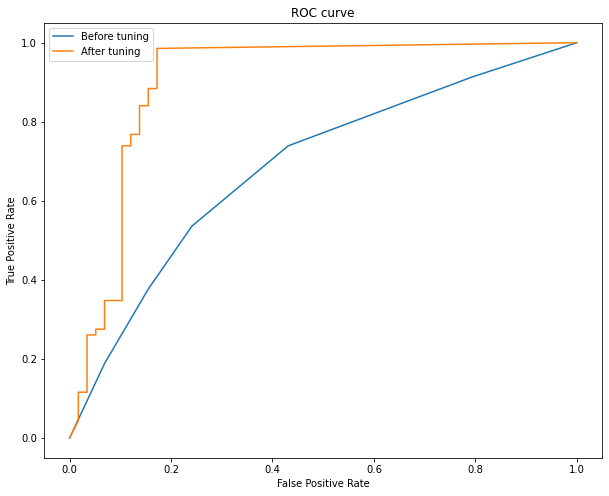

AUC score 0.9009245377311343


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

#define metrics
y_pred_proba = rs.best_estimator_.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

knn_fpr, knn_tpr = fpr,tpr

#create ROC curve
plt.plot(nhp_fpr, nhp_tpr, label='Before tuning')
plt.plot(fpr,tpr, label='After tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.title('ROC curve')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

In [ ]:
'''
trying two feature bundary

two_features = pd.concat([pd.DataFrame(X_train)['Credit_History'], pd.DataFrame(X_train)['Property_Area_Semiurban']], axis=1)

from mlxtend.plotting import plot_decision_regions

def knn_comparison(k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(two_features.values, y_train.values)
    # Plotting decision region
    plot_decision_regions(two_features.values, y_train.values, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
 
for k in [5,7,9,11,13,15]:
    
    knn_comparison(k)
    
'''

"\ntrying two feature bundary\n\ntwo_features = pd.concat([pd.DataFrame(X_train)['Credit_History'], pd.DataFrame(X_train)['Property_Area_Semiurban']], axis=1)\n\nfrom mlxtend.plotting import plot_decision_regions\n\ndef knn_comparison(k):\n    clf = KNeighborsClassifier(n_neighbors=k)\n    clf.fit(two_features.values, y_train.values)\n    # Plotting decision region\n    plot_decision_regions(two_features.values, y_train.values, clf=clf, legend=2)\n    # Adding axes annotations\n    plt.xlabel('X')\n    plt.ylabel('Y')\n    plt.title('Knn with K='+ str(k))\n    plt.show()\n \nfor k in [5,7,9,11,13,15]:\n    \n    knn_comparison(k)\n    \n"

In [ ]:
# yes cross validation, yes hyper parameter tuning

params = rs.best_params_

knn_clf = KNeighborsClassifier(n_neighbors=params['n_neighbors'], weights=params['weights'], metric=params['metric'])

scores = model_selection.cross_validate(knn_clf, X, y, cv=5, scoring="accuracy",  return_train_score=True)

print('Train scores:')
print(scores['train_score'].mean())
print('Test scores:')
print(scores['test_score'].mean())

Train scores:
1.0
Test scores:
0.7465201465201465


<h4> Naive Bayes </h4>

In [ ]:
from sklearn.naive_bayes import GaussianNB

# yes cross validation, no hyper parameter tuning

g_n_byes = GaussianNB()

scores = cross_val_score(g_n_byes, X, y, cv=5, scoring="accuracy")

print(scores.mean())

0.7132642998027614


In [ ]:
# no cross validation, no hyper parameter tuning

g_n_byes = GaussianNB()

g_n_byes.fit(X_train, y_train)
 
y_pred = g_n_byes.predict(X_test)

print(accuracy_score(y_test, y_pred))


0.7165354330708661


In [ ]:
#define metrics
y_pred_proba = g_n_byes.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

nhp_fpr, nhp_tpr = fpr,tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

AUC score 0.7236381809095453


In [ ]:
# tuning hyper parameters

hyperparameter_space = { 'var_smoothing': np.logspace(0,-9, num=100)}

g_n_byes = GaussianNB()

rs = GridSearchCV(g_n_byes, param_grid=hyperparameter_space,
                        scoring="accuracy",
                        n_jobs=-1, cv=5, return_train_score=True)

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)

# no cross validation, yes hyper parameter tuning

rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

Optimal hyperparameter combination: {'var_smoothing': 1.2328467394420635e-09}

Mean cross-validated training accuracy score: 0.7126651126651127
Test accuracy: 0.72


[[30 28]
 [ 8 61]]


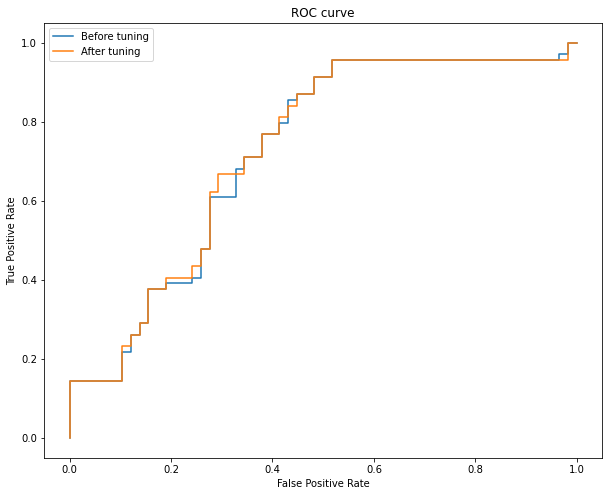

AUC score 0.7268865567216393


In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

#define metrics
y_pred_proba = rs.best_estimator_.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

gnn_fpr, gnn_tpr = fpr, tpr

#create ROC curve
plt.plot(nhp_fpr, nhp_tpr, label='Before tuning')
plt.plot(fpr,tpr, label='After tuning')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best')
plt.title('ROC curve')
plt.show()

auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('AUC score',auc)

In [ ]:
# yes cross validation, yes hyper parameter tuning

params = rs.best_params_

g_n_byes = GaussianNB(var_smoothing=params['var_smoothing'])

scores = model_selection.cross_validate(g_n_byes, X, y, cv=5, scoring="accuracy",  return_train_score=True)

print('Train scores:')
print(scores['train_score'].mean())
print('Test scores:')
print(scores['test_score'].mean())

Train scores:
0.7135660749506905
Test scores:
0.7132642998027614


Combined ROC

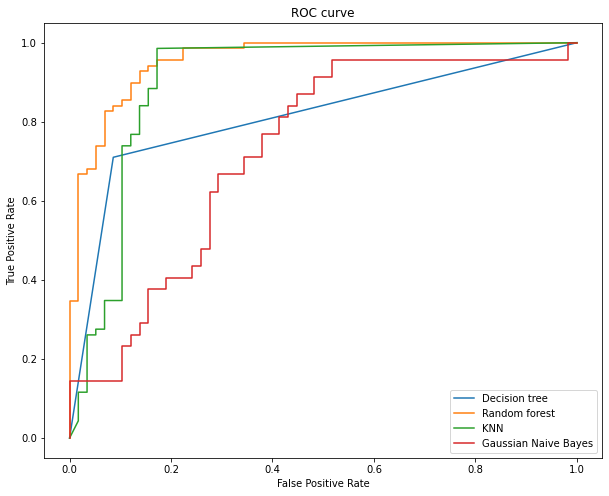

In [ ]:
plt.plot(dt_fpr,dt_tpr, label='Decision tree')
plt.plot(rdf_fpr,rdf_tpr, label='Random forest')
plt.plot(knn_fpr,knn_tpr, label='KNN')
plt.plot(gnn_fpr,gnn_tpr, label='Gaussian Naive Bayes')
plt.legend(loc="best")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC curve')
plt.show()